# SCRAPPING AND PROCESSING DATA 

## Import all useful libraries
#### requests and BeautifulSoup
    These Libraries were used to scrap the data
#### Pandas
    This library was used for data cleaning and processing
#### Matplotlib and seaborn
    These libraries were used to plot the graphs for visualization
## Data Source (Scrapping) and processing
The data was scrapped from jobberman website. The dataset is all about latest IT jobsin Nigeria posted on jobberman website. Jobberman is a website dedicated to posting job adverts in Nigeria. The dataset was scrapped from 7 different pages. The following are the links where the dataset was scrapped from:
+ https://www.jobberman.com/jobs/it-telecoms
+ https://www.jobberman.com/jobs/it-telecoms?page=2
+ https://www.jobberman.com/jobs/it-telecoms?page=3
+ https://www.jobberman.com/jobs/it-telecoms?page=4
+ https://www.jobberman.com/jobs/it-telecoms?page=5
+ https://www.jobberman.com/jobs/it-telecoms?page=6
+ https://www.jobberman.com/jobs/it-telecoms?page=7

After scrapping the dataset was save locally, so that jobberman new job update will not affect the analysis result.

The next thing was to save different information into a list. **job_tile, company, location_type and desc** were the list created for collection of various data. A challange was encounted in collection the **salary range, location, and job_type** differently as they all have the same html class name.To solve this **location_type** list collected them all in one list. 
The scrapped data had \n both before and after the scrapped text. This was removed using replace() method.
There were other unwanted text that were scrapped along in the lists, which came along because they shared the same class name with the html tags that contained the needed text. These were removed using list slicing over a certain steps Example *recruiters5 = recruiter5[2::3]*

Next, each dataset from each page was saved to a dictionary named **page1_data, page2_data, page3_data, page4_data, page5_data, page6_data, and page7_data**. The data was eventually combined into one dataset named **full_data**

## Data Cleaning 
The data had to be cleaned. It was noticed that there are empty spaces before and after some data cells, hence reading the same data as different which unnecessarily increased the number of unique data. Example 'Lagos' was different from ' Lagos' because of the space. A regex expression was applied before and after the data in each column to remove empty spaces at the begining and end of every phrase or word.

The salary range column had salaries with NGN. Example NGN75,000-150,000. There were some jobs too that has salary as Confidential or On Commission. There was need to get the average values of the salary range for the purpose of analysis. Firstly, replace method was used to remove the NGN, the Confidential and Commision salary rows were replaced with 1, and the colume then splitted using split() with expand set to True, hence creating an upper and lower salary range. The average of the salary was save in a column called 'Average Salary'. The dataset was ready to be explored.

## Exploratory Data Analysis and Insights gained
describe() method was used to gain basic information from the data about each data column. Various grahs were plotted to arrive at the following insghts.
- Lagos has the highest number of available IT jobs, this means that one may need to relocate to Lagos if he wants to quickly secure IT job. Remote jobs and jobs found in Abuja have higher pay than those in Lagos.
- Senior Engineer role was the highest paying advertised IT job, followed by Senior developers role and thirdly Full-stack developer roles.
- A data analyst will likely get an IT role faster
- Full time roles pays most especially when they are remote .
- Most advertised IT jobs salary range is  NGN75,000-150,000


In [4]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [5]:
#page1
urlp1 = "https://www.jobberman.com/jobs/it-telecoms"
resp1 = requests.get(urlp1)
page1 = resp1.content
#page2
urlp2 = "https://www.jobberman.com/jobs/it-telecoms?page=2"
resp2 = requests.get(urlp2)
page2 = resp2.content
#page3
urlp3 = "https://www.jobberman.com/jobs/it-telecoms?page=3"
resp3 = requests.get(urlp3)
page3 = resp3.content
#page4
urlp4 = "https://www.jobberman.com/jobs/it-telecoms?page=4"
resp4 = requests.get(urlp4)
page4 = resp4.content
#page5
urlp5 = "https://www.jobberman.com/jobs/it-telecoms?page=5"
resp5 = requests.get(urlp5)
page5 = resp5.content
#page6
urlp6 = "https://www.jobberman.com/jobs/it-telecoms?page=6"
resp6 = requests.get(urlp6)
page6 = resp6.content
#page7
urlp7 = "https://www.jobberman.com/jobs/it-telecoms?page=6"
resp7 = requests.get(urlp7)
page7 = resp7.content



In [6]:
#view page one to see how the the rest of the pages displays
page1

b'<!DOCTYPE html>\n<html class="no-js scroll-smooth" lang="en-ng">\n<head>\n<meta charset="utf-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n<meta name="google-site-verification" content="4hClu3W3PtjepabInbxYOahjMMOlzUNqWBY9OKZJtdA" />\n<meta name="csrf-token" content="OKtgvQt7qWAZZ3he074psImfo0eOdsPEBE9W7tTL">\n<link rel="prerender" href="https://www.jobberman.com/listings/senior-manager-tech-9948kv">\n<link rel="prerender" href="https://www.jobberman.com/listings/senior-engineer-kg4g58">\n<link rel="prerender" href="https://www.jobberman.com/listings/full-stack-developer-q7jdew">\n<link rel="prerender" href="https://www.jobberman.com/listings/senior-sales-executive-85ez79">\n<link rel="prerender" href="https://www.jobberman.com/listings/senior-developer-w2vz56">\n<link rel="prerender" href="https://www.jobberman.com/listings/uiux-designer-kg45v5">\n<link rel="prerender" href="https://www.jobberman.com/listings/full-stack-developer-g9ng

In [7]:
soup1 = BeautifulSoup(page1, "html.parser")
soup2 = BeautifulSoup(page2, "html.parser")
soup3 = BeautifulSoup(page3, "html.parser")
soup4 = BeautifulSoup(page4, "html.parser")
soup5 = BeautifulSoup(page5, "html.parser")
soup6 = BeautifulSoup(page6, "html.parser")
soup7 = BeautifulSoup(page7, "html.parser")



In [8]:
#page1
job_title = soup1.select(".mb-3 .text-lg")
company = soup1.select(".items-center .text-link-500")
location_type = soup1.select(".mt-3 .mr-2")
desc = soup1.select(".w-full p.text-gray-500")
#page2
job_title2 = soup2.select(".mb-3 .text-lg")
company2 = soup2.select(".items-center .text-link-500")
location_type2 = soup2.select(".mt-3 .mr-2")
desc2 = soup2.select(".w-full p.text-gray-500")
#page3
job_title3 = soup3.select(".mb-3 .text-lg")
company3 = soup3.select(".items-center .text-link-500")
location_type3 = soup3.select(".mt-3 .mr-2")
desc3 = soup3.select(".w-full p.text-gray-500")
#page4
job_title4 = soup4.select(".mb-3 .text-lg")
company4 = soup4.select(".items-center .text-link-500")
location_type4 = soup4.select(".mt-3 .mr-2")
desc4 = soup4.select(".w-full p.text-gray-500")
#page5
job_title5 = soup5.select(".mb-3 .text-lg")
company5 = soup5.select(".items-center .text-link-500")
location_type5 = soup5.select(".mt-3 .mr-2")
desc5 = soup5.select(".w-full p.text-gray-500")
#page6
job_title6 = soup6.select(".mb-3 .text-lg")
company6 = soup6.select(".items-center .text-link-500")
location_type6 = soup6.select(".mt-3 .mr-2")
desc6 = soup6.select(".w-full p.text-gray-500")
#page7
job_title7 = soup7.select(".mb-3 .text-lg")
company7 = soup7.select(".items-center .text-link-500")
location_type7 = soup7.select(".mt-3 .mr-2")
desc7 = soup7.select(".w-full p.text-gray-500")


In [9]:
location_type

[<span class="mb-3 px-3 py-1 rounded bg-brand-secondary-100 mr-2 text-loading-hide">
 Lagos
 </span>,
 <span class="mb-3 px-3 py-1 rounded bg-brand-secondary-100 mr-2 text-loading-hide">
 Full Time
 </span>,
 <span class="mb-3 px-3 py-1 rounded bg-brand-secondary-100 mr-2 text-loading-hide">
 NGN
 <span class="mr-1">
 75,000 - 150,000
 </span></span>,
 <span class="mb-3 px-3 py-1 rounded bg-brand-secondary-100 mr-2 text-loading-hide">
 Lagos
 </span>,
 <span class="mb-3 px-3 py-1 rounded bg-brand-secondary-100 mr-2 text-loading-hide">
 Full Time
 </span>,
 <span class="mb-3 px-3 py-1 rounded bg-brand-secondary-100 mr-2 text-loading-hide">
 NGN Confidential
 </span>,
 <span class="mb-3 px-3 py-1 rounded bg-brand-secondary-100 mr-2 text-loading-hide">
 Ibadan &amp; Oyo State
 </span>,
 <span class="mb-3 px-3 py-1 rounded bg-brand-secondary-100 mr-2 text-loading-hide">
 Full Time
 </span>,
 <span class="mb-3 px-3 py-1 rounded bg-brand-secondary-100 mr-2 text-loading-hide">
 NGN Confidenti

In [10]:
#page1
job_title = [jobtitle.get_text() for jobtitle in job_title]
company =[coy.get_text() for coy in company]
location_type =[ltp.get_text() for ltp in location_type]
desc = [des.get_text() for des in desc]

#page2
job_title2 = [jobtitle2.get_text() for jobtitle2 in job_title2]
company2 =[coy2.get_text() for coy2 in company2]
location_type2 =[ltp2.get_text() for ltp2 in location_type2]
desc2 = [des2.get_text() for des2 in desc2]
#page3
job_title3 = [jobtitle3.get_text() for jobtitle3 in job_title3]
company3 =[coy3.get_text() for coy3 in company3]
location_type3 =[ltp3.get_text() for ltp3 in location_type3]
desc3 = [des3.get_text() for des3 in desc3]
#page4
job_title4 = [jobtitle4.get_text() for jobtitle4 in job_title4]
company4 =[coy4.get_text() for coy4 in company4]
location_type4 =[ltp4.get_text() for ltp4 in location_type4]
desc4 = [des4.get_text() for des4 in desc4]
#page5
job_title5 = [jobtitle5.get_text() for jobtitle5 in job_title5]
company5 =[coy5.get_text() for coy5 in company5]
location_type5 =[ltp5.get_text() for ltp5 in location_type5]
desc5 = [des5.get_text() for des5 in desc5]
#page6
job_title6 = [jobtitle6.get_text() for jobtitle6 in job_title6]
company6 =[coy6.get_text() for coy6 in company6]
location_type6 =[ltp6.get_text() for ltp6 in location_type6]
desc6 = [des6.get_text() for des6 in desc6]
#page7
job_title7 = [jobtitle7.get_text() for jobtitle7 in job_title7]
company7 =[coy7.get_text() for coy7 in company7]
location_type7 =[ltp7.get_text() for ltp7 in location_type7]
desc7 = [des7.get_text() for des7 in desc7]


In [11]:
#page1
position = [] #column1
recruiter = [] 
locationtypepay=[]
job_descript=[]
job_descriptions=[]
for x in job_title:
    position.append(x.replace("\n", ""))
for y in company:
    recruiter.append(y.replace("\n", ""))
for z in location_type:
    locationtypepay.append(z.replace("\n", ""))
for a in desc:
    job_descript.append(a.replace("\n",""))
for b in job_descript:
    job_descriptions.append(b.replace("Job Function:","").strip())
recruiters = recruiter[2::3] 
recruited  = recruiters[:19]#column2
location = locationtypepay[::3] #colum|n3
job_type = locationtypepay[1::3] #column4
salary_range = locationtypepay[2::3] #column5
job_description=job_descriptions[:19] #column6

#page2
position2 = [] #column1
recruiter2 = [] 
locationtypepay2=[]
job_descript2=[]
job_descriptions2=[]
for x2 in job_title2:
    position2.append(x2.replace("\n", ""))
for y2 in company2:
    recruiter2.append(y2.replace("\n", ""))
for z2 in location_type2:
    locationtypepay2.append(z2.replace("\n", ""))
for a2 in desc2:
    job_descript2.append(a2.replace("\n",""))
for b2 in job_descript2:
    job_descriptions2.append(b2.replace("Job Function:","").strip())
recruiters2 = recruiter2[2::3] 
recruited2  = recruiters2[:19]#column2
location2 = locationtypepay2[::3] #colum|n3
job_type2 = locationtypepay2[1::3] #column4
salary_range2 = locationtypepay2[2::3] #column5
job_description2=job_descriptions2[:19] #column6

#page3
position3 = [] #column1
recruiter3 = [] 
locationtypepay3=[]
job_descript3=[]
job_descriptions3=[]
for x3 in job_title3:
    position3.append(x3.replace("\n", ""))
for y3 in company3:
    recruiter3.append(y3.replace("\n", ""))
for z3 in location_type3:
    locationtypepay3.append(z3.replace("\n", ""))
for a3 in desc3:
    job_descript3.append(a3.replace("\n",""))
for b3 in job_descript3:
    job_descriptions3.append(b3.replace("Job Function:","").strip())
recruiters3 = recruiter3[2::3] 
recruited3  = recruiters3[:19]#column2
location3 = locationtypepay3[::3] #colum|n3
job_type3 = locationtypepay3[1::3] #column4
salary_range3 = locationtypepay3[2::3] #column5
job_description3=job_descriptions3[:19] #column6
#page4
position4 = [] #column1
recruiter4 = [] 
locationtypepay4=[]
job_descript4=[]
job_descriptions4=[]
for x4 in job_title4:
    position4.append(x4.replace("\n", ""))
for y4 in company4:
    recruiter4.append(y4.replace("\n", ""))
for z4 in location_type4:
    locationtypepay4.append(z4.replace("\n", ""))
for a4 in desc4:
    job_descript4.append(a4.replace("\n",""))
for b4 in job_descript4:
    job_descriptions4.append(b4.replace("Job Function:","").strip())
recruiters4 = recruiter4[2::3] 
recruited4  = recruiters4[:19]#column2
location4 = locationtypepay4[::3] #colum|n3
job_type4 = locationtypepay4[1::3] #column4
salary_range4 = locationtypepay4[2::3] #column5
job_description4=job_descriptions4[:19] #column6
#page5
position5 = [] #column1
recruiter5 = [] 
locationtypepay5=[]
job_descript5=[]
job_descriptions5=[]
for x5 in job_title5:
    position5.append(x5.replace("\n", ""))
for y5 in company5:
    recruiter5.append(y5.replace("\n", ""))
for z5 in location_type5:
    locationtypepay5.append(z5.replace("\n", ""))
for a5 in desc5:
    job_descript5.append(a5.replace("\n",""))
for b5 in job_descript5:
    job_descriptions5.append(b5.replace("Job Function:","").strip())
recruiters5 = recruiter5[2::3] 
recruited5  = recruiters5[:19]#column2
location5 = locationtypepay5[::3] #colum|n3
job_type5 = locationtypepay5[1::3] #column4
salary_range5 = locationtypepay5[2::3] #column5
job_description5=job_descriptions5[:19] #column6
#page6
position6 = [] #column1
recruiter6 = [] 
locationtypepay6=[]
job_descript6=[]
job_descriptions6=[]
for x6 in job_title6:
    position6.append(x6.replace("\n", ""))
for y6 in company6:
    recruiter6.append(y6.replace("\n", ""))
for z6 in location_type6:
    locationtypepay6.append(z6.replace("\n", ""))
for a6 in desc6:
    job_descript6.append(a6.replace("\n",""))
for b6 in job_descript6:
    job_descriptions6.append(b6.replace("Job Function:","").strip())

recruiters6 = recruiter6[2::3] 
recruited6  = recruiters6[:19]#column2
location6 = locationtypepay6[::3] #colum|n3
job_type6 = locationtypepay6[1::3] #column4
salary_range6 = locationtypepay6[2::3] #column5
job_description6=job_descriptions6[:19] #column6

#page7
position7 = [] #column1
recruiter7 = [] 
locationtypepay7=[]
job_descript7=[]
job_descriptions7=[]
for x7 in job_title7:
    position7.append(x7.replace("\n", ""))
for y7 in company7:
    recruiter7.append(y7.replace("\n", ""))
for z7 in location_type7:
    locationtypepay7.append(z7.replace("\n", ""))
for a7 in desc7:
    job_descript7.append(a7.replace("\n",""))
for b7 in job_descript7:
    job_descriptions7.append(b7.replace("Job Function:","").strip())

recruiters7 = recruiter7[2::3] 
recruited7  = recruiters7[:19]#column2
location7 = locationtypepay7[::3] #colum|n3
job_type7 = locationtypepay7[1::3] #column4
salary_range7 = locationtypepay7[2::3] #column5
job_description7=job_descriptions7[:19] #column6


In [12]:
page1_data = {"Position":position, "Company":recruited, "Job Location":location,"Type of Job":job_type, "Salary Range":salary_range, "Job Description":job_description}
page2_data = {"Position":position2, "Company":recruited2, "Job Location":location2,"Type of Job":job_type2, "Salary Range":salary_range2, "Job Description":job_description2}
page3_data = {"Position":position, "Company":recruited3, "Job Location":location3,"Type of Job":job_type3, "Salary Range":salary_range3, "Job Description":job_description3}
page4_data = {"Position":position2, "Company":recruited4, "Job Location":location4,"Type of Job":job_type4, "Salary Range":salary_range4, "Job Description":job_description4}
page5_data = {"Position":position, "Company":recruited5, "Job Location":location5,"Type of Job":job_type5, "Salary Range":salary_range5, "Job Description":job_description5}
page6_data = {"Position":position6, "Company":recruited6, "Job Location":location6,"Type of Job":job_type6, "Salary Range":salary_range6, "Job Description":job_description6}
page7_data = {"Position":position7, "Company":recruited7, "Job Location":location7,"Type of Job":job_type7, "Salary Range":salary_range7, "Job Description":job_description7}


In [13]:
page1_data = pd.DataFrame(data=page1_data)
page2_data = pd.DataFrame(data=page2_data)
page3_data = pd.DataFrame(data=page3_data)
page4_data = pd.DataFrame(data=page4_data)
page5_data = pd.DataFrame(data=page5_data)
page6_data = pd.DataFrame(data=page6_data)
page7_data = pd.DataFrame(data=page7_data)


all_data = [page1_data,page2_data,page3_data,page4_data,page5_data,page6_data,page7_data]

full_data =  pd.concat(all_data, ignore_index=True)

In [14]:
full_data.head()

,Position,Company,Job Location,Type of Job,Salary Range,Job Description
0,Fleet Manager,Artoas Global Services Limited,Lagos,Full Time,"NGN75,000 - 150,000",Admin & Office
1,Fine Artist,MKT MEDIA TRADING LTD,Lagos,Full Time,NGN Confidential,Creative & Design
2,Human Resource Officer,Seven Hills Property,Ibadan & Oyo State,Full Time,NGN Confidential,Human Resources
3,Senior Manager (Tech),Whip-Smart Service Providers Limited,Lagos,Full Time,"NGN900,000 - 1,200,000",Software & Data
4,Senior Engineer,234code,Remote (Work From Home),Full Time,"NGN900,000 - 1,200,000",Software & Data


In [15]:
full_data['Job Location'] = full_data['Job Location'].str.replace('^ +', '')

C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_5384\2599428172.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  full_data['Job Location'] = full_data['Job Location'].str.replace('^ +', '')


In [16]:
full_data['Job Location'] = full_data['Job Location'].str.replace(' +$', '')

C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_5384\3752483263.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  full_data['Job Location'] = full_data['Job Location'].str.replace(' +$', '')


In [17]:
#permanently clean empty spaces before and after each string in each column
full_data['Job Location'] = full_data['Job Location'].str.replace('^ +', '')
full_data['Job Location'] = full_data['Job Location'].str.replace(' +$', '')
full_data['Position'] = full_data['Position'].str.replace('^ +', '')
full_data['Position'] = full_data['Position'].str.replace(' +$', '')
full_data['Company'] = full_data['Company'].str.replace('^ +', '')
full_data['Company'] = full_data['Company'].str.replace(' +$', '')
full_data['Type of Job'] = full_data['Type of Job'].str.replace('^ +', '')
full_data['Type of Job'] = full_data['Type of Job'].str.replace(' +$', '')
full_data['Salary Range'] = full_data['Salary Range'].str.replace('^ +', '')
full_data['Salary Range'] = full_data['Salary Range'].str.replace(' +$', '')
full_data['Job Description'] = full_data['Job Description'].str.replace('^ +', '')
full_data['Job Description'] = full_data['Job Description'].str.replace(' +$', '')
full_data['Position'] = full_data['Position'].str.replace('Full Stack Developer', 'Full-Stack Developer')


C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_5384\1340681621.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  full_data['Job Location'] = full_data['Job Location'].str.replace('^ +', '')
C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_5384\1340681621.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  full_data['Job Location'] = full_data['Job Location'].str.replace(' +$', '')
C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_5384\1340681621.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  full_data['Position'] = full_data['Position'].str.replace('^ +', '')
C:\Users\Anih Nathan\AppData\Local\Temp\ipykernel_5384\1340681621.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  full_data['Position'] = full_data['Position'].str.replace(' +$', '')
C:\Users\Anih Nathan\AppData\Local\T

### Download Dataset

In [18]:
full_data.to_csv('jobbermandat.csv')

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [6]:
#url of downloaded data
url=r'c:/Users/Anih Nathan/jobbermandat.csv'
full_data = pd.read_csv(url)
full_data



,Unnamed: 0,Position,Company,Job Location,Type of Job,Salary Range,Job Description
0,0,Fleet Manager,Artoas Global Services Limited,Lagos,Full Time,"NGN75,000 - 150,000",Admin & Office
1,1,Fine Artist,MKT MEDIA TRADING LTD,Lagos,Full Time,NGN Confidential,Creative & Design
2,2,Human Resource Officer,Seven Hills Property,Ibadan & Oyo State,Full Time,NGN Confidential,Human Resources
3,3,Senior Manager (Tech),Whip-Smart Service Providers Limited,Lagos,Full Time,"NGN900,000 - 1,200,000",Software & Data
4,4,Senior Engineer,234code,Remote (Work From Home),Full Time,"NGN900,000 - 1,200,000",Software & Data
...,...,...,...,...,...,...,...
128,128,React Native Mobile Developer,Your Internet Pages,Lagos,Full Time,"NGN150,000 - 250,000",Software & Data
129,129,UI-UX Developer,Pethahiah,Lagos,Full Time,"NGN250,000 - 400,000",Software & Data
130,130,UI/UX Designer,Your Internet Pages,Lagos,Internship & Graduate,"NGN75,000 - 150,000",Software & Data
131,131,IT Security Officer,ipNX Nigeria,Lagos,Full Time,"NGN400,000 - 600,000",Software & Data


In [7]:
full_data.drop(['Unnamed: 0'], inplace=True, axis=1)


In [8]:
full_data

,Position,Company,Job Location,Type of Job,Salary Range,Job Description
0,Fleet Manager,Artoas Global Services Limited,Lagos,Full Time,"NGN75,000 - 150,000",Admin & Office
1,Fine Artist,MKT MEDIA TRADING LTD,Lagos,Full Time,NGN Confidential,Creative & Design
2,Human Resource Officer,Seven Hills Property,Ibadan & Oyo State,Full Time,NGN Confidential,Human Resources
3,Senior Manager (Tech),Whip-Smart Service Providers Limited,Lagos,Full Time,"NGN900,000 - 1,200,000",Software & Data
4,Senior Engineer,234code,Remote (Work From Home),Full Time,"NGN900,000 - 1,200,000",Software & Data
...,...,...,...,...,...,...
128,React Native Mobile Developer,Your Internet Pages,Lagos,Full Time,"NGN150,000 - 250,000",Software & Data
129,UI-UX Developer,Pethahiah,Lagos,Full Time,"NGN250,000 - 400,000",Software & Data
130,UI/UX Designer,Your Internet Pages,Lagos,Internship & Graduate,"NGN75,000 - 150,000",Software & Data
131,IT Security Officer,ipNX Nigeria,Lagos,Full Time,"NGN400,000 - 600,000",Software & Data


In [9]:
full_data['Salary'] = full_data['Salary Range'].str.replace('NGN','').str.replace(',','').str.replace('Less than','').str.replace('Confidential','1').str.strip()

In [10]:
full_data[['Lower Salary', 'Upper Salary']] = full_data['Salary'].str.split('-', expand=True)

In [11]:
#remove doo
full_data['Lower Salary']=full_data['Lower Salary'].str.replace('USD','').str.replace('Commission Only','1')

In [12]:
full_data['Lower Salary'] = full_data['Lower Salary'].fillna(0).astype('int')

In [13]:
full_data['Upper Salary'] = full_data['Upper Salary'].fillna(1).astype('int')

In [14]:
full_data['Average Salary'] =(full_data['Lower Salary']+full_data['Upper Salary'])/2
full_data['Average Salary'].astype('int')

0       112500
1            1
2            1
3      1050000
4      1050000
        ...   
128     200000
129     325000
130     112500
131     500000
132      37500
Name: Average Salary, Length: 133, dtype: int32

In [15]:
#remove mixed none IT positions as they are not IT job
full_data = full_data[full_data['Position']!='Human Resource Officer']
full_data = full_data[full_data['Position']!='Fleet Manager']
full_data = full_data[full_data['Position']!='Marketer']
full_data = full_data[full_data['Position']!='Telco Account Manager']

In [16]:
full_data.describe(include='all')

,Position,Company,Job Location,Type of Job,Salary Range,Job Description,Salary,Lower Salary,Upper Salary,Average Salary
count,114,114,114,114,114,114,114,114.000000,1.140000e+02,1.140000e+02
unique,39,59,7,4,11,13,11,NaN,NaN,NaN
top,Full-Stack Developer,Pethahiah,Lagos,Full Time,"NGN75,000 - 150,000",Software & Data,75000 - 150000,NaN,NaN,NaN
freq,9,12,80,100,30,40,30,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139973.824561,2.075529e+05,1.737634e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151947.707059,2.274645e+05,1.883898e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000e+00,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75000.000000,1.000000e+00,3.750050e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75000.000000,1.500000e+05,1.125000e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000.000000,2.500000e+05,2.000000e+05


## Job Availability based on number of adverts made

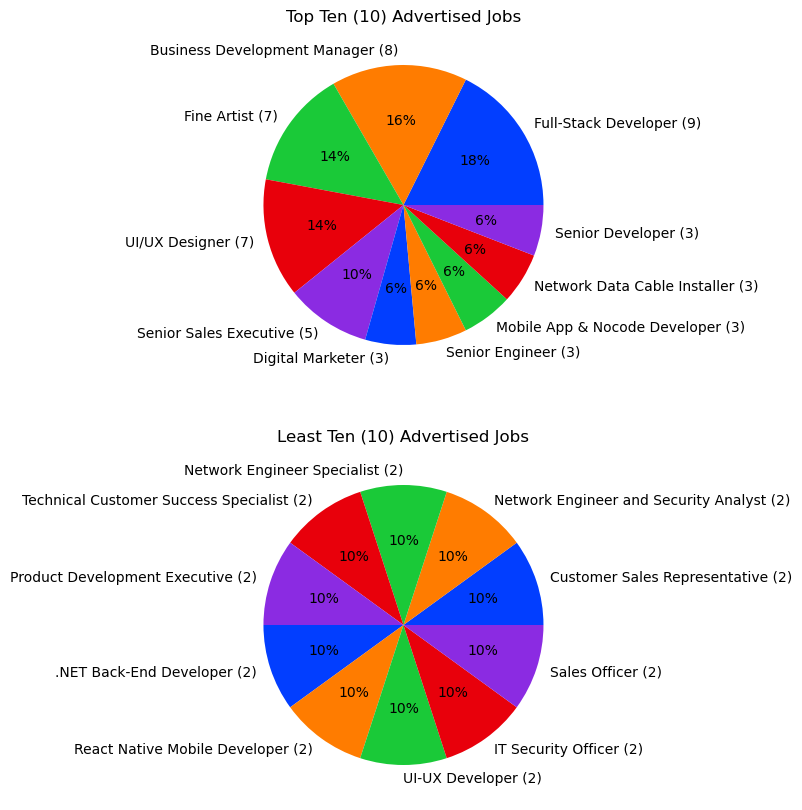

In [17]:
topadvert =full_data['Position'].value_counts().sort_values(ascending= False).head(10)
leastadvert =full_data['Position'].value_counts().sort_values(ascending= False).tail(10)
colors = sn.color_palette('bright')[0:5]
labeltop = topadvert.index +" "+ '(' + topadvert.values.astype(str) +')'
labelleast = leastadvert.index +" "+ '(' + leastadvert.values.astype(str) +')'
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.pie(topadvert.values, labels = labeltop, colors = colors, autopct='%.f%%')
plt.title("Top Ten (10) Advertised Jobs")

plt.subplot(2,1,2)
plt.pie(leastadvert.values, labels = labelleast, colors = colors, autopct='%.f%%')
plt.title("Least Ten (10) Advertised Jobs")
plt.show()

# Cities with most available Jobs

[Text(0, 1, '80'),
 Text(0, 1, '17'),
 Text(0, 1, '11'),
 Text(0, 1, '3'),
 Text(0, 1, '1'),
 Text(0, 1, '1'),
 Text(0, 1, '1')]

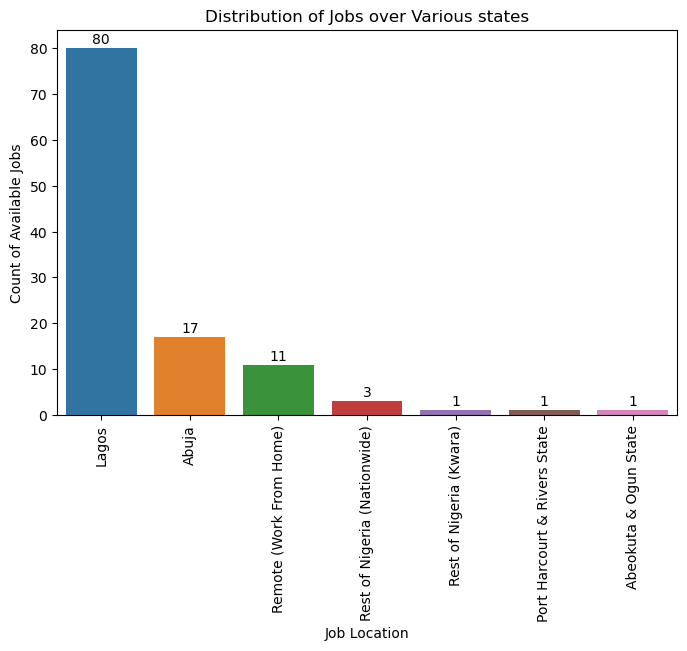

In [18]:
job_area = full_data['Job Location'].value_counts()

fig, ax = plt.subplots(figsize=(8, 5))
plotbar = sn.barplot(x=job_area.index, y=job_area.values)
plt.title("Distribution of Jobs over Various states")
plt.xlabel("Job Location")
plt.ylabel("Count of Available Jobs")
plt.xticks(rotation=90)

plotbar.bar_label(ax.containers[0], label_type='edge', padding=1)

[Text(0, 1, '100'), Text(0, 1, '8'), Text(0, 1, '5'), Text(0, 1, '1')]

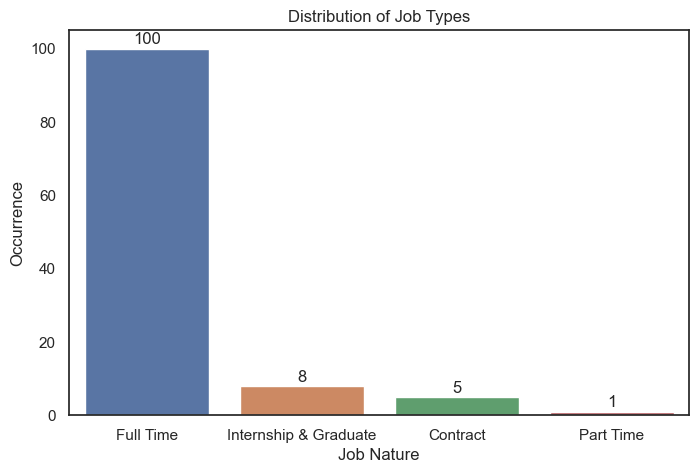

In [19]:
sn.set(style='white')
occur = full_data['Type of Job'].value_counts()
fig, ax = plt.subplots(figsize=(8, 5))
plotbar=sn.barplot(x =occur.index,y=occur.values)
plt.title("Distribution of Job Types")
plt.xlabel("Job Nature")
plt.ylabel("Occurrence")
plt.xticks(rotation=0)
plotbar.bar_label(ax.containers[0], label_type='edge', padding=1)

## SALARY EXPECTATION AND FACTORS TO DEAL WITH

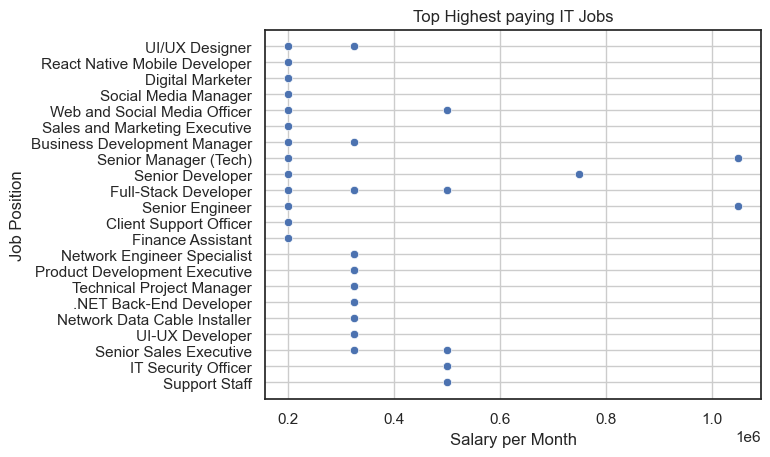

In [20]:
sn.set(style='white')
#occur = full_data['Company'].value_count()
occur = full_data.sort_values('Average Salary')['Position'].tail(40)
occur2 = full_data.sort_values('Average Salary')['Average Salary'].tail(40)
#occur = full_data.groupby('Company').size().iloc[:10].sort_index( ascending=False)

sn.scatterplot(x =occur2.values,y=occur.values)
plt.title("Top Highest paying IT Jobs")
plt.xlabel("Salary per Month")
plt.ylabel("Job Position")
plt.xticks(rotation=0)
plt.grid()

##  UI/UX position salary Variation

In [35]:
full_data[full_data['Position']=='UI/UX Designer'].sort_values(['Average Salary']).tail()

,Position,Company,Job Location,Type of Job,Salary Range,Job Description,Salary,Lower Salary,Upper Salary,Average Salary
46,UI/UX Designer,Emporg Limited,Lagos,Internship & Graduate,"NGNLess than 75,000",Engineering & Technology,75000,75000,1,37500.5
71,UI/UX Designer,Bellah Options,Abeokuta & Ogun State,Full Time,"NGNLess than 75,000",Creative & Design,75000,75000,1,37500.5
33,UI/UX Designer,Frontlett Virtualting,Abuja,Full Time,"NGN75,000 - 150,000",Software & Data,75000 - 150000,75000,150000,112500.0
111,UI/UX Designer,Your Internet Pages,Lagos,Internship & Graduate,"NGN75,000 - 150,000",Software & Data,75000 - 150000,75000,150000,112500.0
130,UI/UX Designer,Your Internet Pages,Lagos,Internship & Graduate,"NGN75,000 - 150,000",Software & Data,75000 - 150000,75000,150000,112500.0
8,UI/UX Designer,Towaider,Lagos,Contract,"NGN150,000 - 250,000",Software & Data,150000 - 250000,150000,250000,200000.0
84,UI/UX Designer,Atareconsultancyservices,Lagos,Full Time,"NGN250,000 - 400,000",Engineering & Technology,250000 - 400000,250000,400000,325000.0


## Web and Social Media position salary Variation

In [23]:
full_data[full_data['Position']=='Web and Social Media Officer'].sort_values(['Average Salary'])

,Position,Company,Job Location,Type of Job,Salary Range,Job Description,Salary,Lower Salary,Upper Salary,Average Salary
15,Web and Social Media Officer,A.A MATTHEW & CO INTERNATIONAL LTD,Lagos,Full Time,"NGN75,000 - 150,000",Engineering & Technology,75000 - 150000,75000,150000,112500.0
53,Web and Social Media Officer,Derive Communications System & Engineering Ltd,Rest of Nigeria (Nationwide),Full Time,"NGN150,000 - 250,000",Product & Project Management,150000 - 250000,150000,250000,200000.0
91,Web and Social Media Officer,Atareconsultancyservices,Lagos,Full Time,"NGN400,000 - 600,000",Engineering & Technology,400000 - 600000,400000,600000,500000.0


## Business Development Manager Position Salary Variation

In [24]:
full_data[full_data['Position']=='Business Development Manager'].sort_values(['Average Salary'])

,Position,Company,Job Location,Type of Job,Salary Range,Job Description,Salary,Lower Salary,Upper Salary,Average Salary
98,Business Development Manager,Mac center,Lagos,Full Time,NGN Confidential,Management & Business Development,1,1,1,1.0
117,Business Development Manager,Mac center,Lagos,Full Time,NGN Confidential,Management & Business Development,1,1,1,1.0
74,Business Development Manager,DONQUESTER CONSULTING,Lagos,Full Time,"NGNLess than 75,000",Marketing & Communications,75000,75000,1,37500.5
36,Business Development Manager,De-Future Elite Technology,Abuja,Full Time,"NGN75,000 - 150,000",Management & Business Development,75000 - 150000,75000,150000,112500.0
37,Business Development Manager,EarlyBird Crystals Technology Limited,Lagos,Full Time,"NGN150,000 - 250,000",Management & Business Development,150000 - 250000,150000,250000,200000.0
103,Business Development Manager,Blackbox Technology Systems LTD,Abuja,Full Time,"NGN150,000 - 250,000",Management & Business Development,150000 - 250000,150000,250000,200000.0
122,Business Development Manager,Blackbox Technology Systems LTD,Abuja,Full Time,"NGN150,000 - 250,000",Management & Business Development,150000 - 250000,150000,250000,200000.0
75,Business Development Manager,iTAP Solutions Ltd,Lagos,Full Time,"NGN250,000 - 400,000",Software & Data,250000 - 400000,250000,400000,325000.0


## Senior Manager (Tech) position salary Variation

In [25]:
full_data[full_data['Position']=='Senior Manager (Tech)'].sort_values(['Average Salary'])

,Position,Company,Job Location,Type of Job,Salary Range,Job Description,Salary,Lower Salary,Upper Salary,Average Salary
79,Senior Manager (Tech),DONQUESTER CONSULTING,Lagos,Full Time,"NGNLess than 75,000",Sales,75000,75000,1,37500.5
41,Senior Manager (Tech),Jim Paul,Lagos,Full Time,"NGN150,000 - 250,000",Management & Business Development,150000 - 250000,150000,250000,200000.0
3,Senior Manager (Tech),Whip-Smart Service Providers Limited,Lagos,Full Time,"NGN900,000 - 1,200,000",Software & Data,900000 - 1200000,900000,1200000,1050000.0


## Senior Developer Variation

In [26]:
full_data[full_data['Position']=='Senior Developer'].sort_values(['Average Salary'])

,Position,Company,Job Location,Type of Job,Salary Range,Job Description,Salary,Lower Salary,Upper Salary,Average Salary
45,Senior Developer,Emporg Limited,Lagos,Internship & Graduate,"NGNLess than 75,000",Management & Business Development,75000,75000,1,37500.5
83,Senior Developer,Atareconsultancyservices,Lagos,Full Time,"NGN150,000 - 250,000",Product & Project Management,150000 - 250000,150000,250000,200000.0
7,Senior Developer,Jobberman (Third Party Recruitment),Abuja,Full Time,"NGN600,000 - 900,000",Software & Data,600000 - 900000,600000,900000,750000.0


## Full Stack Developer Salary Variation

In [27]:
full_data[full_data['Position']=='Full-Stack Developer'].sort_values(['Average Salary'])

,Position,Company,Job Location,Type of Job,Salary Range,Job Description,Salary,Lower Salary,Upper Salary,Average Salary
5,Full-Stack Developer,G2EMO TECHNOLOGIES,Lagos,Contract,"NGN75,000 - 150,000",Software & Data,75000 - 150000,75000,150000,112500.0
43,Full-Stack Developer,Loctech Nigeria Limited,Port Harcourt & Rivers State,Full Time,"NGN75,000 - 150,000",Engineering & Technology,75000 - 150000,75000,150000,112500.0
47,Full-Stack Developer,Sunej Global Ventures LTD,Lagos,Full Time,"NGN75,000 - 150,000","Accounting, Auditing & Finance",75000 - 150000,75000,150000,112500.0
49,Full-Stack Developer,Unified Payment Services Limited,Lagos,Full Time,"NGN75,000 - 150,000",Software & Data,75000 - 150000,75000,150000,112500.0
81,Full-Stack Developer,Atareconsultancyservices,Lagos,Full Time,"NGN150,000 - 250,000",Engineering & Technology,150000 - 250000,150000,250000,200000.0
9,Full-Stack Developer,Towaider,Lagos,Contract,"NGN250,000 - 400,000",Software & Data,250000 - 400000,250000,400000,325000.0
87,Full-Stack Developer,Atareconsultancyservices,Lagos,Full Time,"NGN250,000 - 400,000",Creative & Design,250000 - 400000,250000,400000,325000.0
11,Full-Stack Developer,Anonymous Employer,Lagos,Full Time,"NGN400,000 - 600,000",Software & Data,400000 - 600000,400000,600000,500000.0
85,Full-Stack Developer,Atareconsultancyservices,Lagos,Full Time,"NGN400,000 - 600,000",Engineering & Technology,400000 - 600000,400000,600000,500000.0


## Senoir Engineer Salary Variation

In [28]:
full_data[full_data['Position']=='Senior Engineer'].sort_values(['Average Salary'])

,Position,Company,Job Location,Type of Job,Salary Range,Job Description,Salary,Lower Salary,Upper Salary,Average Salary
42,Senior Engineer,SD-6 Consortium,Rest of Nigeria (Nationwide),Internship & Graduate,NGNCommission Only,Sales,Commission Only,1,1,1.0
80,Senior Engineer,Atareconsultancyservices,Lagos,Full Time,"NGN150,000 - 250,000",Engineering & Technology,150000 - 250000,150000,250000,200000.0
4,Senior Engineer,234code,Remote (Work From Home),Full Time,"NGN900,000 - 1,200,000",Software & Data,900000 - 1200000,900000,1200000,1050000.0


## Senior Developer Salary Variation

In [29]:
full_data[full_data['Position']=='Senior Sales Executive'].sort_values(['Average Salary'])

,Position,Company,Job Location,Type of Job,Salary Range,Job Description,Salary,Lower Salary,Upper Salary,Average Salary
44,Senior Sales Executive,Un Phones Ltd,Lagos,Full Time,"NGNLess than 75,000",Admin & Office,75000,75000,1,37500.5
63,Senior Sales Executive,Iconns Group,Lagos,Full Time,"NGN75,000 - 150,000",Admin & Office,75000 - 150000,75000,150000,112500.0
82,Senior Sales Executive,Kachitech Digital Services,Lagos,Full Time,"NGN75,000 - 150,000",Software & Data,75000 - 150000,75000,150000,112500.0
25,Senior Sales Executive,Partners for Information Systems,Abuja,Full Time,"NGN250,000 - 400,000",Sales,250000 - 400000,250000,400000,325000.0
6,Senior Sales Executive,The Source Computers Limited,Lagos,Full Time,"NGN400,000 - 600,000",Sales,400000 - 600000,400000,600000,500000.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'UI/UX Designer'),
  Text(1, 0, 'React Native Mobile Developer'),
  Text(2, 0, 'Digital Marketer'),
  Text(3, 0, 'Social Media Manager'),
  Text(4, 0, 'Web and Social Media Officer'),
  Text(5, 0, 'Sales and Marketing Executive'),
  Text(6, 0, 'Business Development Manager'),
  Text(7, 0, 'Senior Manager (Tech)'),
  Text(8, 0, 'Senior Developer'),
  Text(9, 0, 'Full-Stack Developer'),
  Text(10, 0, 'Senior Engineer'),
  Text(11, 0, 'Client Support Officer'),
  Text(12, 0, 'Finance Assistant'),
  Text(13, 0, 'Network Engineer Specialist'),
  Text(14, 0, 'Product Development Executive'),
  Text(15, 0, 'Technical Project Manager'),
  Text(16, 0, '.NET Back-End Developer'),
  Text(17, 0, 'Network Data Cable Installer'),
  Text(18, 0, 'UI-UX Developer'),
  Text(19, 0, 'Senior Sales Executive'),
  Text(20, 0, 'IT Security Officer'),
  Text(21, 0, 'Support Staff')])

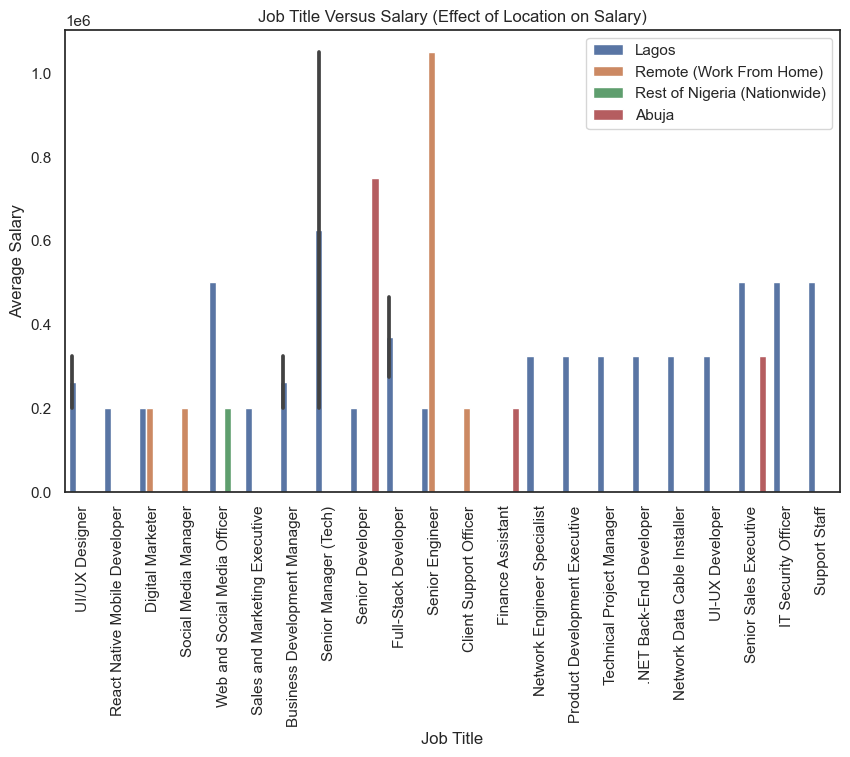

In [37]:
sn.set(style='white')
plt.figure(figsize=(10,6))
occur = full_data.sort_values('Average Salary')['Position'].tail(40)
occur2 = full_data.sort_values('Average Salary')['Average Salary'].tail(40)
occur3 = full_data.sort_values('Average Salary')['Job Location'].tail(40)
sn.barplot(y =occur2.values,x=occur.values,hue=occur3.values)
plt.legend(loc='upper right')

plt.title("Job Title Versus Salary (Effect of Location on Salary)")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'UI/UX Designer'),
  Text(1, 0, 'React Native Mobile Developer'),
  Text(2, 0, 'Digital Marketer'),
  Text(3, 0, 'Social Media Manager'),
  Text(4, 0, 'Web and Social Media Officer'),
  Text(5, 0, 'Sales and Marketing Executive'),
  Text(6, 0, 'Business Development Manager'),
  Text(7, 0, 'Senior Manager (Tech)'),
  Text(8, 0, 'Senior Developer'),
  Text(9, 0, 'Full-Stack Developer'),
  Text(10, 0, 'Senior Engineer'),
  Text(11, 0, 'Client Support Officer'),
  Text(12, 0, 'Finance Assistant'),
  Text(13, 0, 'Network Engineer Specialist'),
  Text(14, 0, 'Product Development Executive'),
  Text(15, 0, 'Technical Project Manager'),
  Text(16, 0, '.NET Back-End Developer'),
  Text(17, 0, 'Network Data Cable Installer'),
  Text(18, 0, 'UI-UX Developer'),
  Text(19, 0, 'Senior Sales Executive'),
  Text(20, 0, 'IT Security Officer'),
  Text(21, 0, 'Support Staff')])

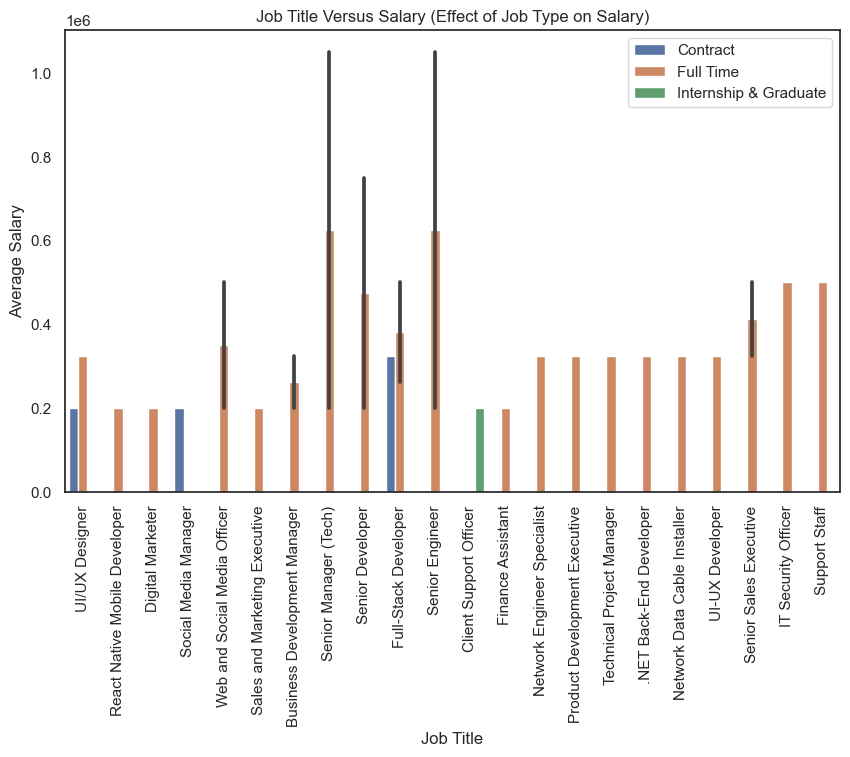

In [105]:
sn.set(style='white')
plt.figure(figsize=(10,6))
occur = full_data.sort_values('Average Salary')['Position'].tail(40)
occur2 = full_data.sort_values('Average Salary')['Average Salary'].tail(40)
occur3 = full_data.sort_values('Average Salary')['Type of Job'].tail(40)
sn.barplot(y =occur2.values,x=occur.values,hue=occur3.values)
plt.legend(loc='upper right')

plt.title("Job Title Versus Salary (Effect of Job Type on Salary)")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.xticks(rotation=90)

[Text(0, 1, '30'),
 Text(0, 1, '21'),
 Text(0, 1, '18'),
 Text(0, 1, '16'),
 Text(0, 1, '15'),
 Text(0, 1, '7'),
 Text(0, 1, '2'),
 Text(0, 1, '2'),
 Text(0, 1, '1'),
 Text(0, 1, '1'),
 Text(0, 1, '1')]

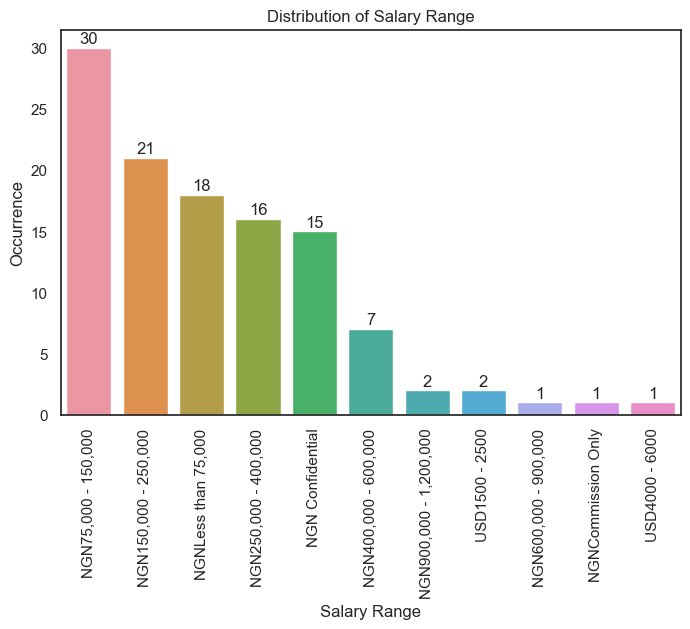

In [121]:
sn.set(style='white')
occur = full_data['Salary Range'].value_counts()
fig, ax = plt.subplots(figsize=(8, 5))
plotbar=sn.barplot(x =occur.index,y=occur.values)
plt.title("Distribution of Salary Range")
plt.xlabel("Salary Range")
plt.ylabel("Occurrence")
plt.xticks(rotation=90)
plotbar.bar_label(ax.containers[0], label_type='edge', padding=1)

In [32]:
full_data[full_data['Salary Range']=='USD1500 - 2500']

,Position,Company,Job Location,Type of Job,Salary Range,Job Description,Salary,Lower Salary,Upper Salary,Average Salary
16,Manual QA Software Tester,Wallethub,Remote (Work From Home),Full Time,USD1500 - 2500,Software & Data,USD1500 - 2500,1500,2500,2000.0
17,Automation Software Tester,Wallethub,Remote (Work From Home),Full Time,USD1500 - 2500,Software & Data,USD1500 - 2500,1500,2500,2000.0


In [33]:
full_data[full_data['Salary Range']=='USD4000 - 6000']

,Position,Company,Job Location,Type of Job,Salary Range,Job Description,Salary,Lower Salary,Upper Salary,Average Salary
87,Full-Stack Developer,Wallethub,Remote (Work From Home),Full Time,USD4000 - 6000,Software & Data,USD4000 - 6000,4000,6000,5000.0
